# Market Model - Notebook 3
In this notebook various step by step implementations of the market model are proposed, in order to fully understand how the model is able to describe a variety of market patterns by adding different types of agents.

The mesa python library is used for this agent based modeling of markets and some sub-libraries like RandomActivation and DataCollector are imported which allow the model to activate agents in a random order and to collect data at each timestep.

The random library is also widely used in this model to add stocasticity in a controlled way by using a fixed seed and to make the initialization data more realistic (not all agents will start with the same exact wealth, but with some random differences).

In [2]:
# load config, libraries and scripts
%run 00.config.ipynb

# load built agents classes
%run 01.agents.ipynb

# load built models classes
%run 02.models.ipynb

## 3. Running the Models

### 3.1 Running Model with only Savers

In [3]:
N_agents = 10
Price = 10
Last_Price = Price
p_savers = 1.
savers_sentiment = 0.70

model = Market_Model_1(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26


In [3]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

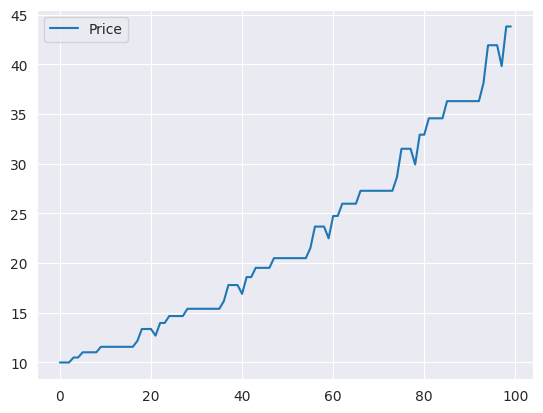

In [4]:
sns.set_style("darkgrid")
model_vars.plot();

It is observed that since savers are given a periodic behaviour of investing in the same position but with different frequencies then a trivial price trend pattern is a natural result in the direction of savers sentiment, which is a given model parameter.

### 3.2 Running Model with Savers and Random Traders

In [5]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.8
savers_sentiment = 0.70

model = Market_Model_2(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26
saver_10: 	 $ 944.09
saver_11: 	 $ 955.64
saver_12: 	 $ 901.3
saver_13: 	 $ 931.93
saver_14: 	 $ 968.05
saver_15: 	 $ 943.06
saver_16: 	 $ 967.32
saver_17: 	 $ 975.99
saver_18: 	 $ 1069.5
saver_19: 	 $ 952.9
saver_20: 	 $ 1045.95
saver_21: 	 $ 924.97
saver_22: 	 $ 975.71
saver_23: 	 $ 958.64


In [6]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

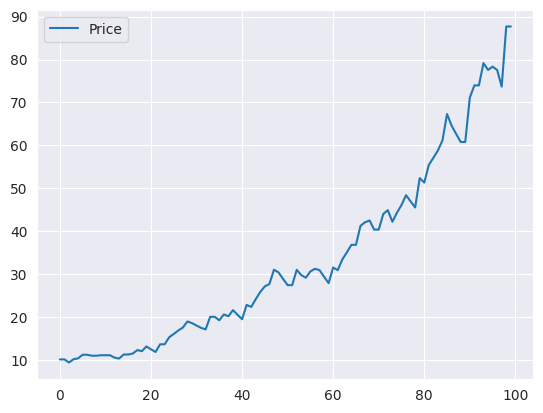

In [7]:
model_vars.plot();

In market with only savers and random traders one must pay attention to the amount of random traders and how much they can afford to exchange, this behaviour is controlled with self.order and p_savers.

Assuming that savers invest more than a random trader, which means that savers influence the price more (self.order for them is higher), it is observed that the price trend given by savers_sentiment persists but with some noise given by random tranders.

If self.order for savers is not high enough one observes that price trend is broken by random price oscillations and in some runs it may even invert the previous trend.

In [8]:
display(agent_vars)
agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_19       952.900000     sell      0
     rnd_trader_4          NaN      buy      1
     rnd_trader_3          NaN      buy      1
     saver_11       955.640000      buy      0
     saver_18      1069.500000     sell      0
...                        ...      ...    ...
100  saver_0        632.625435      buy      0
     saver_21       545.830511     sell      0
     rnd_trader_0          NaN     sell      1
     saver_14       823.571006      buy      0
     saver_13       650.522612      buy      0

[3000 rows x 3 columns]

### 3.3 Running Model with Savers, Random Traders and Followers

In [9]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.6
p_followers = 0.2
savers_sentiment = 0.70

model = Market_Model_3(N_agents, Price, p_savers, p_followers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26
saver_10: 	 $ 944.09
saver_11: 	 $ 955.64
saver_12: 	 $ 901.3
saver_13: 	 $ 931.93
saver_14: 	 $ 968.05
saver_15: 	 $ 943.06
saver_16: 	 $ 967.32
saver_17: 	 $ 975.99
follower_0: 	 $ 641.7	 close_thr: 11.0%
follower_1: 	 $ 636.86	 close_thr: 12.3%
follower_2: 	 $ 604.35	 close_thr: 14.7%
follower_3: 	 $ 585.42	 close_thr: 10.5%
follower_4: 	 $ 639.53	 close_thr: 11.2%
follower_5: 	 $ 643.4	 close_thr: 10.8%


In [10]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

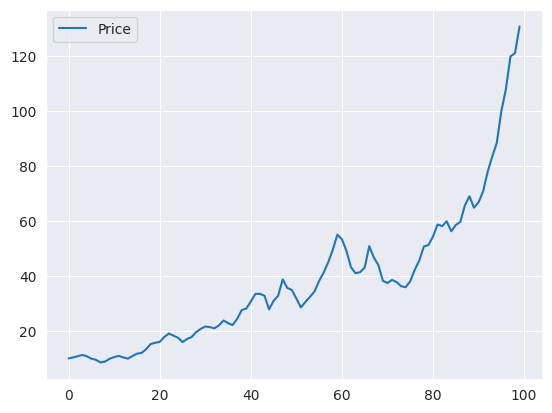

In [11]:
model_vars.plot();

In [12]:
display(agent_vars)
agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                
1    follower_4   649.530000     null      0
     saver_2     1047.290000      buy      0
     saver_1      948.980000      buy      0
     follower_3   595.420000     null      0
     saver_7     1020.400000      buy      0
...                      ...      ...    ...
100  saver_13     619.234198     sell      0
     follower_0  2318.642572      buy      1
     saver_16     139.074105     sell      0
     saver_0      606.919582      buy      0
     saver_6      522.994730      buy      0

[3000 rows x 3 columns]

### 3.4 Running Model with Savers, Random Traders, Followers and Whales

In [65]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.05
savers_sentiment = 0.55
WLT = 10

model = Market_Model_4(N_agents, Price, p_savers, p_followers, p_whales, savers_sentiment, WLT)

N_steps = 500
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10


In [66]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

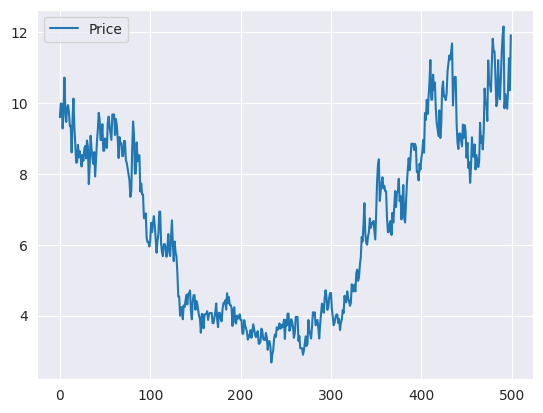

In [67]:
model_vars.plot();

In [68]:
model_vars.to_csv('../data/model_vars.csv')

In a market simulation, if the main objective is to observe a pretty realistic chart, then one should keep high the percentage of random traders.

Instead if one wants to capture the noiseless trend given by savers, followers and whales effects on price dynamics the percentage of random traders should be kept small.